In [1]:
import requests as r
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import time
import random
import math 
import os
import re


pd.options.display.max_rows = None
pd.options.display.max_columns = None

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.read_csv('df_final.csv').drop(columns=['Unnamed: 0']).columns

Index(['last_season_before_transfer', 'Age', 'Starts_abs_change',
       'Starts_log_change', 'Min_abs_change', 'Min_log_change',
       'Gls_abs_change', 'Gls_log_change', 'Ast_abs_change', 'Ast_log_change',
       'CrdY_abs_change', 'CrdY_log_change', 'CrdR_abs_change',
       'CrdR_log_change', 'SoT_abs_change', 'SoT_log_change',
       'G/Sh_abs_change', 'G/Sh_log_change', 'passing_Att_abs_change',
       'passing_Att_log_change', 'passing_Cmp%_abs_change',
       'passing_Cmp%_log_change', 'TklW_abs_change', 'TklW_log_change',
       'Blocks_abs_change', 'Blocks_log_change', 'Int_abs_change',
       'Int_log_change', 'Clr_abs_change', 'Clr_log_change',
       'dribbles_Att_abs_change', 'dribbles_Att_log_change',
       'Carries_abs_change', 'Carries_log_change', 'Rec_abs_change',
       'Rec_log_change', 'club_score_abs_change', 'club_score_log_change',
       'mv_abs_change', 'mv_log_change', 'Arsenal FC',
       'Brighton & Hove Albion', 'Chelsea FC', 'Crystal Palace', 'Everton 

In [3]:
df = pd.read_csv('df_final.csv').drop(columns=['Unnamed: 0'])


print(df.shape)

for_all = [
    'last_season_before_transfer', 'Age', 'Arsenal FC', 'Brighton & Hove Albion', 'Chelsea FC',
    'Crystal Palace', 'Everton FC', 'Liverpool FC', 'Manchester City', 'Manchester United', 
    'Newcastle United', 'Tottenham Hotspur', 'West Ham United', 'Wolverhampton Wanderers', 
    'attack', 'defence','goalkeeper', 'midfield', '2019', '2020', '2021', '2022'
]

mvs = ['mv_abs_change', 'mv_log_change']

abses = [
       'Starts_abs_change', 'Min_abs_change', 'Gls_abs_change', 'Ast_abs_change', 'CrdY_abs_change',
       'CrdR_abs_change', 'SoT_abs_change', 'G/Sh_abs_change', 'passing_Att_abs_change',
       'passing_Cmp%_abs_change', 'TklW_abs_change', 'Blocks_abs_change', 'Int_abs_change', 
       'Clr_abs_change', 'dribbles_Att_abs_change', 'Carries_abs_change', 'Rec_abs_change',
       'club_score_abs_change'
]



loges = [
       'Starts_log_change', 'Min_log_change', 'Gls_log_change', 'Ast_log_change', 'CrdY_log_change',
       'CrdR_log_change', 'SoT_log_change', 'G/Sh_log_change', 'passing_Att_log_change',
       'passing_Cmp%_log_change', 'TklW_log_change', 'Blocks_log_change', 'Int_log_change', 
       'Clr_log_change', 'dribbles_Att_log_change', 'Carries_log_change', 'Rec_log_change', 
       'club_score_log_change'
]


df_abs = df[for_all+abses+['mv_abs_change']]
df_log = df[for_all+loges+['mv_log_change']]

# df_abs = df[for_all+abses+['mv_log_change']]
# df_log = df[for_all+loges+['mv_log_change']]


df_abs.drop(columns=['Starts_abs_change', 'passing_Att_abs_change', 'Carries_abs_change', 'Rec_abs_change'],inplace=True)
df_log.drop(columns=['Starts_log_change', 'passing_Att_log_change', 'Carries_log_change', 'Rec_log_change'],inplace=True)

print(df_abs.shape)
print(df_log.shape)

df_abs.head()



# df_abs.to_csv('df3.csv')
# df_log.to_csv('df4.csv')

(873, 60)
(873, 37)
(873, 37)


,last_season_before_transfer,Age,Arsenal FC,Brighton & Hove Albion,Chelsea FC,Crystal Palace,Everton FC,Liverpool FC,Manchester City,Manchester United,Newcastle United,Tottenham Hotspur,West Ham United,Wolverhampton Wanderers,attack,defence,goalkeeper,midfield,2019,2020,2021,2022,Min_abs_change,Gls_abs_change,Ast_abs_change,CrdY_abs_change,CrdR_abs_change,SoT_abs_change,G/Sh_abs_change,passing_Cmp%_abs_change,TklW_abs_change,Blocks_abs_change,Int_abs_change,Clr_abs_change,dribbles_Att_abs_change,club_score_abs_change,mv_abs_change
0,0,33.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,-1181.0,-3.0,-2.0,-3.0,-1.0,-2.0,0.00,4.8,-12.0,-38.0,-15.0,-25.0,-9.0,-1.87500,-3500000.0
1,0,34.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,104.0,-4.0,-3.0,0.0,0.0,-2.0,-0.06,-1.8,8.0,20.0,9.0,2.0,0.0,-2.78125,-1000000.0
2,0,35.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,-373.0,0.0,2.0,-1.0,0.0,-1.0,0.00,-0.7,-9.0,-14.0,0.0,3.0,-11.0,3.37500,-500000.0
3,1,36.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,-81.0,0.0,-1.0,-2.0,0.0,-2.0,0.00,-3.5,3.0,-4.0,-8.0,-6.0,18.0,-4.25625,-500000.0
4,1,37.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,-2131.0,-21.0,-1.0,-6.0,0.0,-42.0,-0.11,-1.9,-5.0,-13.0,-1.0,-26.0,-27.0,1.43750,0.0


In [4]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

# OLS1 (ABS ABS)
y1 = df_abs['mv_abs_change']
X1 = df_abs.drop(columns=['mv_abs_change', 'goalkeeper', '2019', 'Everton FC'])
X1 = sm.add_constant(X1)
# klasyczny ziomek to bramkarz z 2019 z Evertonu

OLS1 = sm.OLS(y1, X1).fit()

# OLS2 (ABS LOG)
y2 = df_abs['mv_abs_change']
X2 = df_log.drop(columns=['mv_log_change', 'goalkeeper', '2019', 'Everton FC'])
X2 = sm.add_constant(X2)
# klasyczny ziomek to bramkarz z 2019 z Evertonu

OLS2 = sm.OLS(y2, X2).fit()

# OLS3 (LOG ABS)
y3 = df_log['mv_log_change']
X3 = df_abs.drop(columns=['mv_abs_change', 'goalkeeper', '2019', 'Everton FC'])
X3 = sm.add_constant(X3)
# klasyczny ziomek to bramkarz z 2019 z Evertonu

OLS3 = sm.OLS(y3, X3).fit()

# OLS4 (LOG LOG)
y4 = df_log['mv_log_change']
X4 = df_log.drop(columns=['mv_log_change', 'goalkeeper', '2019', 'Everton FC'])
X4 = sm.add_constant(X4)
# klasyczny ziomek to bramkarz z 2019 z Evertonu

OLS4 = sm.OLS(y4, X4).fit()

# OLS5 (LOG ABS) Odporne błędy standardowe)
y5 = df_log['mv_log_change']
X5 = df_abs.drop(columns=['mv_abs_change', 'goalkeeper', '2019', 'Everton FC'])
X5 = sm.add_constant(X5)
# klasyczny ziomek to bramkarz z 2019 z Evertonu

OLS5 = sm.OLS(y5, X5).fit(cov_type = "HC0")

# OLS6 (LOG LOG) Odporne błędy standardowe)
y6 = df_log['mv_log_change']
X6 = df_log.drop(columns=['mv_log_change', 'goalkeeper', '2019', 'Everton FC'])
X6 = sm.add_constant(X6)
# klasyczny ziomek to bramkarz z 2019 z Evertonu

OLS6 = sm.OLS(y6, X6).fit(cov_type = "HC0")

print(OLS6.summary())

                            OLS Regression Results                            
Dep. Variable:          mv_log_change   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     8.437
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           3.59e-34
Time:                        14:40:50   Log-Likelihood:                -473.91
No. Observations:                 873   AIC:                             1016.
Df Residuals:                     839   BIC:                             1178.
Df Model:                          33                                         
Covariance Type:                  HC0                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

### <b> TEST RESET </b>

In [5]:
import statsmodels.stats.diagnostic as smd

testreset1 = smd.linear_reset(res=OLS1, power=3, test_type='fitted', use_f=True)
testreset2 = smd.linear_reset(res=OLS2, power=3, test_type='fitted', use_f=True)
testreset3 = smd.linear_reset(res=OLS3, power=3, test_type='fitted', use_f=True)
testreset4 = smd.linear_reset(res=OLS4, power=3, test_type='fitted', use_f=True)
testreset5 = smd.linear_reset(res=OLS5, power=3, test_type='fitted', use_f=True)
testreset6 = smd.linear_reset(res=OLS6, power=3, test_type='fitted', use_f=True)

print(f'testreset1: {testreset1.pvalue}')
print(f'testreset2: {testreset2.pvalue}')
print(f'testreset3: {round(testreset3.pvalue, 5)}')
print(f'testreset4: {round(testreset4.pvalue, 5)}')
print(f'testreset5: {round(testreset5.pvalue, 5)}')
print(f'testreset6: {round(testreset6.pvalue, 5)}')

testreset1: 1.003262715921533e-22
testreset2: 1.7119537423032106e-17
testreset3: 0.47285
testreset4: 0.16746
testreset5: 0.47285
testreset6: 0.16746


### <b> Heteroskedastyczność </b>

In [6]:
white_test1 = smd.het_white(OLS1.resid, exog=OLS1.model.exog)
white_test2 = smd.het_white(OLS2.resid, exog=OLS2.model.exog)
white_test3 = smd.het_white(OLS3.resid, exog=OLS3.model.exog)
white_test4 = smd.het_white(OLS4.resid, exog=OLS4.model.exog)

print(f'white_test1: {round(white_test1[1], 5)}')
print(f'white_test2: {round(white_test2[1], 10)}')
print(f'white_test3: {round(white_test3[1], 10)}')
print(f'white_test4: {round(white_test4[1], 10)}')

white_test1: 0.05329
white_test2: 0.2681913392
white_test3: 0.0072436365
white_test4: 6.243e-07


### <b> Endogenicznosc - korelacja miedzy residualsami a zmiennymi objasniajacymi </b>

In [7]:
# m5 = X5.copy()
# m5['resid'] = OLS5.resid

# m5_scores = m5.corr()['resid'].reset_index().rename(columns={'resid': 'OLS5_resid'})


# m6 = X6.copy()
# m6['resid'] = OLS6.resid

# m6_scores = m6.corr()['resid'].reset_index().rename(columns={'resid': 'OLS6_resid'})['OLS6_resid']


# pd.concat([m5_scores, m6_scores], axis=1).set_index('index')

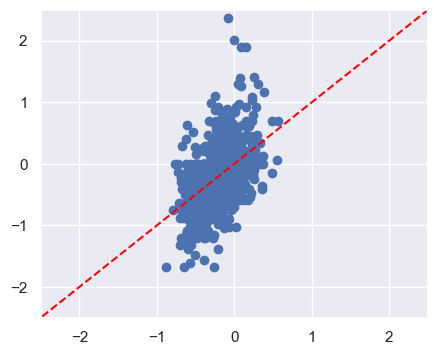

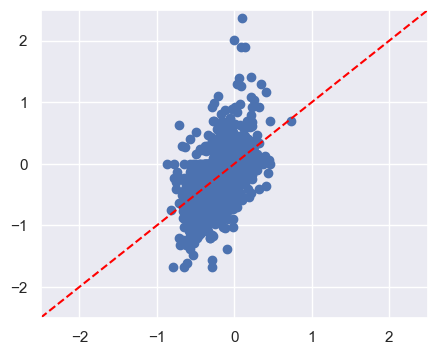

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

from matplotlib.pyplot import figure
figure(figsize=(5, 4), dpi=100)

plt.scatter(OLS5.predict(X5), y5)
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)

line_values = [-60000000 + x for x in range(0, 600000000, 100000)]
plt.plot(line_values, line_values, color='red', linestyle="--")

plt.show()


figure(figsize=(5, 4), dpi=100)

plt.scatter(OLS6.predict(X6), y6)
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)

line_values = [-3 + x/10000 for x in range(100000)]
plt.plot(line_values, line_values, color='red', linestyle="--")

plt.show()

OLS3


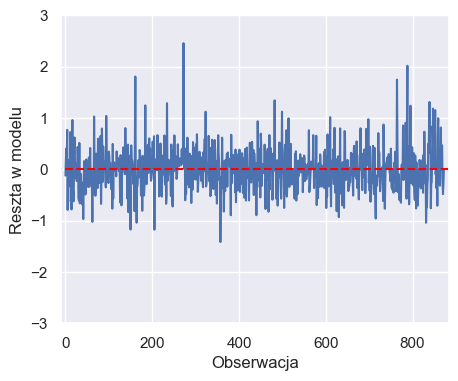


OLS4


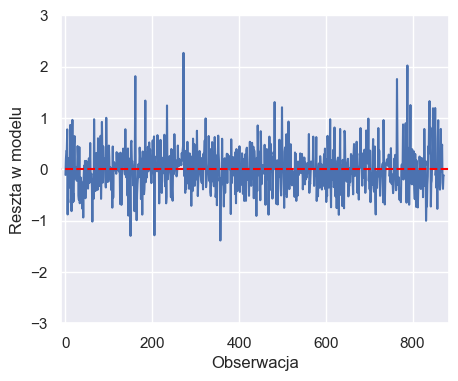

In [9]:
resid2 = OLS2.resid

# print()
# print(sum(resid2))
# print()


# def percentile(n):
#     def percentile_(x):
#         return np.percentile(x, n)
#     percentile_.__name__ = 'percentile_%s' % n
#     return percentile_


# print(percentile(25)(resid2))
# print(percentile(75)(resid2))
# print()

# print(sum(resid2 > 0.5))
# print(sum(resid2 < -0.5))
# print()

# print(resid2[resid2 > 0].mean())
# print(resid2[resid2 < 0].mean())
# print()

# print(resid2[resid2 > 0].sum())
# print(resid2[resid2 < 0].sum())
# print()

resid3 = OLS3.resid

figure(figsize=(5, 4), dpi=100)

plt.plot(list(range(len(resid3))), resid3.reset_index(drop=True), linewidth=1.5)
plt.xlabel('Obserwacja')
plt.ylabel('Reszta w modelu')
# plt.xlim(-10, 185)
plt.xlim(-10, len(resid3)+10)
plt.ylim(-3, 3)

line_values = [x*10000000-100000000 for x in range(len(resid3))]
plt.plot(line_values, [0 for x in line_values], color='red', linestyle="--")

print('OLS3')
plt.show()

print()

resid4 = OLS4.resid

figure(figsize=(5, 4), dpi=100)

plt.plot(list(range(len(resid4))), resid4.reset_index(drop=True), linewidth=1.5)
plt.xlabel('Obserwacja')
plt.ylabel('Reszta w modelu')
# plt.xlim(-10, 185)
plt.xlim(-10, len(resid4)+10)
plt.ylim(-3, 3)

line_values = [x*10000000-100000000 for x in range(len(resid4))]
plt.plot(line_values, [0 for x in line_values], color='red', linestyle="--")

print('OLS4')
plt.show()


OLS5


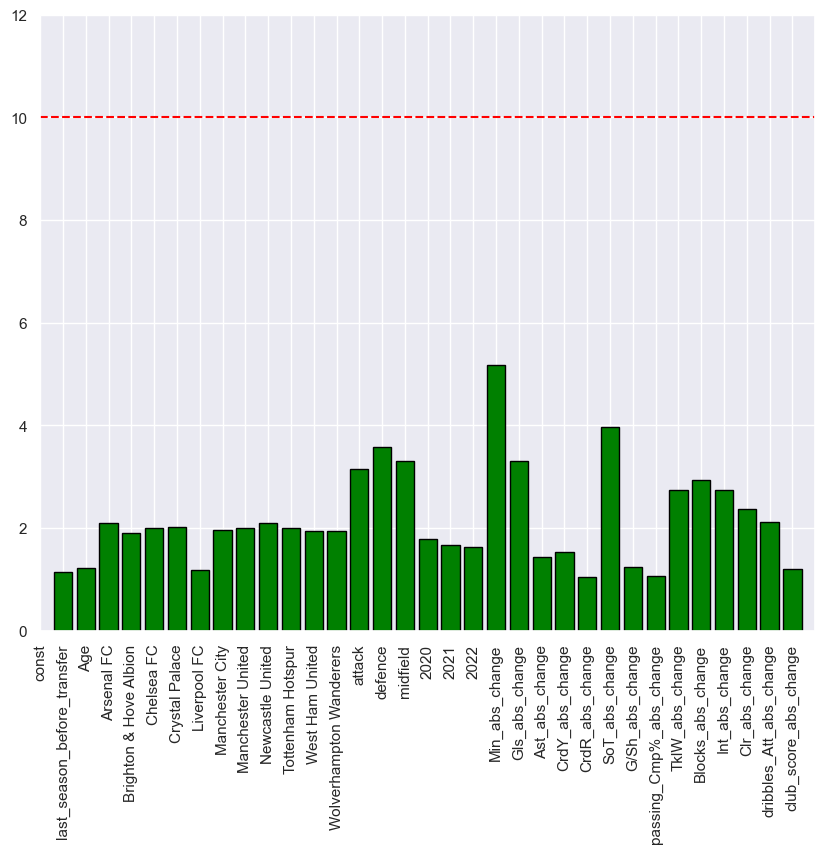


OLS6


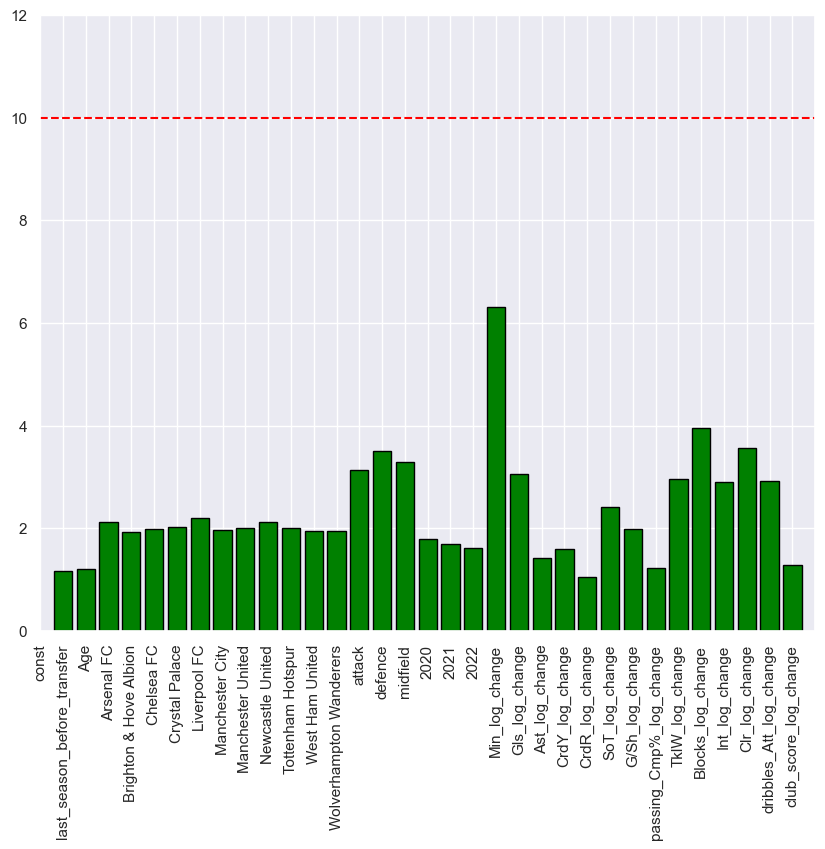

In [10]:
# VIF OLS1

from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

r2_list = []
for col in X5.columns:
    yes = X5[col]
    Xes = X5.drop(columns=[col])

    lm = LinearRegression()
    lm.fit(Xes, yes)

    r2 = lm.score(Xes, yes)
    
    r2_list.append(1/(1-r2))
    
datalool = pd.DataFrame(dict(zip(X5.columns, r2_list)), index=['VIF']).T.reset_index()


figure(figsize=(10, 8), dpi=100)

plt.bar(datalool['index'], datalool['VIF'], color='green', edgecolor='black')

plt.xticks(rotation=90)
plt.xlim(0, len(X5.columns))
plt.ylim(0, 12)

line_values = [x for x in range(len(X5))]
plt.plot(line_values, [10 for x in line_values], color='red', linestyle="--")

print()
print('OLS5')
plt.show()



r2_list = []
for col in X6.columns:
    yes = X6[col]
    Xes = X6.drop(columns=[col])

    lm = LinearRegression()
    lm.fit(Xes, yes)

    r2 = lm.score(Xes, yes)
    
    r2_list.append(1/(1-r2))
    
datalool = pd.DataFrame(dict(zip(X6.columns, r2_list)), index=['VIF']).T.reset_index()


figure(figsize=(10, 8), dpi=100)

plt.bar(datalool['index'], datalool['VIF'], color='green', edgecolor='black')

plt.xticks(rotation=90)
plt.xlim(0, len(X6.columns))
plt.ylim(0, 12)

line_values = [x for x in range(len(X6))]
plt.plot(line_values, [10 for x in line_values], color='red', linestyle="--")

print()
print('OLS6')
plt.show()

### <b> normalność rozkładu składnika losowego - test Jarque-Bera </b>

In [11]:
from statsmodels.stats.stattools import jarque_bera

print(f'OLS5 - JB p-value: {jarque_bera(OLS5.resid)[1]}')
print(f'OLS6 - JB p-value: {jarque_bera(OLS6.resid)[1]}')
print('należy odrzucić hipotezę zerową, a więc składnik losowy nie ma rozkładu normalnego')

OLS5 - JB p-value: 9.790880165322623e-74
OLS6 - JB p-value: 1.33924419302231e-58
należy odrzucić hipotezę zerową, a więc składnik losowy nie ma rozkładu normalnego


OLS5


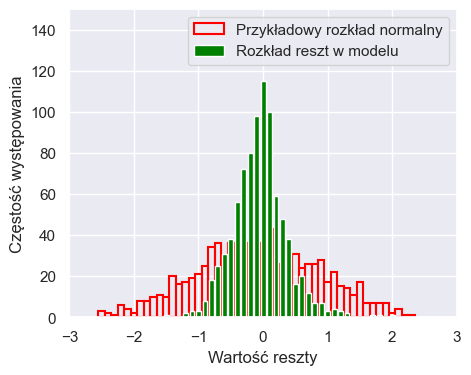


OLS6


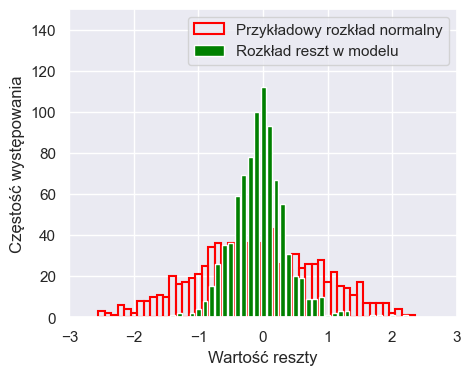

In [12]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set_theme()


reszty = OLS5.resid

labels = pd.cut(reszty, bins=[x/10 for x in range(-25, 25, 1)], labels=[x/10 for x in range(-25, 24, 1)])

data = labels.value_counts().reset_index().rename(columns={'index':'labels', 0:'counts'})


values = []
for i in range(len(OLS5.resid)):
    values.append(np.random.normal())
    
normal_data = pd.DataFrame(values).rename(columns={0: 'normal_values'})

normal_data = pd.cut(normal_data['normal_values'], bins=[x/10 for x in range(-25, 25, 1)], labels=[x/10 for x in range(-25, 24, 1)])


normal_data = normal_data.value_counts().reset_index().rename(columns={'index':'labels', 'normal_values': 'counts'})


figure(figsize=(5, 4), dpi=100)

plt.bar(normal_data['labels'], normal_data['counts'], width=0.1, edgecolor='red',align='center', fill=False, linewidth=1.5, label='Przykładowy rozkład normalny')

plt.bar(data['labels'], data['counts'], width=0.075, color='green', align='center', label='Rozkład reszt w modelu')

plt.xlabel('Wartość reszty')
plt.ylabel('Częstość występowania')

plt.xlim(-3, 3)
plt.ylim(0, 150)

plt.legend()

print('OLS5')
plt.show()


print()


reszty = OLS6.resid

labels = pd.cut(reszty, bins=[x/10 for x in range(-25, 25, 1)], labels=[x/10 for x in range(-25, 24, 1)])

data = labels.value_counts().reset_index().rename(columns={'index':'labels', 0:'counts'})

figure(figsize=(5, 4), dpi=100)

plt.bar(normal_data['labels'], normal_data['counts'], width=0.1, edgecolor='red',align='center', fill=False, linewidth=1.5, label='Przykładowy rozkład normalny')

plt.bar(data['labels'], data['counts'], width=0.075, color='green', align='center', label='Rozkład reszt w modelu')

plt.xlabel('Wartość reszty')
plt.ylabel('Częstość występowania')

plt.xlim(-3, 3)
plt.ylim(0, 150)

plt.legend()

print('OLS6')
plt.show()

<BarContainer object of 22 artists>

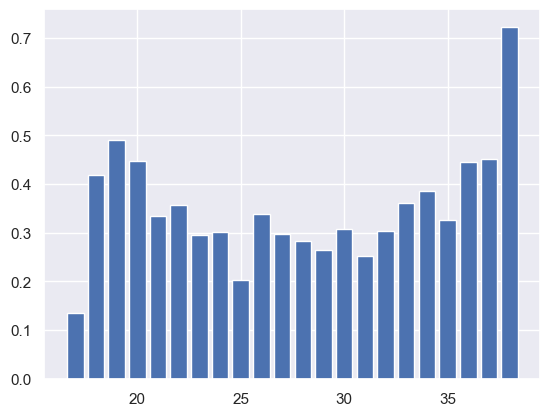

In [13]:
xdd = X5.copy()

resid_labels = pd.cut(OLS5.resid, bins=[x/10 for x in range(-25, 25, 1)], labels=[x/10 for x in range(-25, 24, 1)])

xdd = pd.concat([xdd, resid_labels, OLS5.resid], axis=1)

# xdd['if_so'] = xdd[1].apply(lambda x: True if abs(x) >= 0.3 else False)

# xdd = xdd[xdd['if_so'] == True]

xdd[1] = xdd[1].apply(abs)

data = xdd.groupby('Age')[1].mean().reset_index()

data

plt.bar(data['Age'], data[1])

In [14]:
hypothesis = 'Arsenal FC  = Brighton & Hove Albion = Chelsea FC = Crystal Palace = Liverpool FC = Manchester City = Manchester United = Newcastle United = Tottenham Hotspur = West Ham United = Wolverhampton Wanderers = 0' 

wald_statistic5 = OLS5.wald_test(hypothesis)
wald_statistic6 = OLS6.wald_test(hypothesis)


print(f'OLS5 Wald Test P-value: {wald_statistic5.pvalue:.4f}')
print(f'OLS6 Wald Test P-value: {wald_statistic6.pvalue:.4f}')

OLS5 Wald Test P-value: 0.0068
OLS6 Wald Test P-value: 0.0097


In [15]:
round((sum(OLS5.resid.apply(abs)) / len(OLS5.resid.apply(abs))), 5)

0.30715

In [16]:
round((sum(OLS6.resid.apply(abs)) / len(OLS6.resid.apply(abs))), 5)

0.30898